# k-Nearest Neighbors: Fit & Predict

In [45]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
df = pd.read_csv('../data/Human_Stress_Detection_in_and_through_Sleep/SaYoPillow.csv')
print(df.head(15))
# Create arrays for the features and the response variable
y = df['sl'].values
X = df.drop('sl',axis = 1).values
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)
# Fit the classifier to the data
knn.fit(X,y)
# Predict the labels for the training data X with rows 6 to 10
# y_pred = knn.predict(np.array([X[4]]))
y_pred = knn.predict(X[6:10,:])
print('4th training data prediction: {}'.format(y_pred))
# Predict and print the label for the new data point X_new
X_new = np.array([
    [85.72,23.433,89.761,11.420,89.798,98.32,0.468,65.84], # expected label 3
    [55.81,19.326,94.371,8.377,95.064,82.94,6.377,59.54]   # expected label 1
])
new_pred = knn.predict(X_new)
print('New data prediction: {}'.format(new_pred))

        sr      rr       t      lm      bo     rem   sr.1     hr  sl
0   93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3
1   91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3
2   60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1
3   85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3
4   48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0
5   56.880  19.376  95.376   9.376  94.064   83.44  6.376  58.44   1
6   47.000  16.800  97.200   5.600  95.800   68.00  7.800  52.00   0
7   50.000  18.000  99.000   8.000  97.000   80.00  9.000  55.00   0
8   45.280  16.112  96.168   4.224  95.112   61.12  7.112  50.28   0
9   55.520  19.104  95.104   9.104  93.656   82.76  6.104  57.76   1
10  73.440  21.344  93.344  11.344  91.344   91.72  4.016  63.36   2
11  59.280  19.856  95.856   9.856  94.784   84.64  6.856  59.64   1
12  48.600  17.440  98.160   6.880  96.440   74.40  8.440  53.60   0
13  96.288  26.288  85.360  17.144

# The digits recognition dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

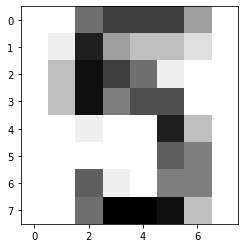

In [37]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Train/Test Split + Fit/Predict/Accuracy

In [46]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


# Overfitting and underfitting

Text(0, 0.5, 'Accuracy')

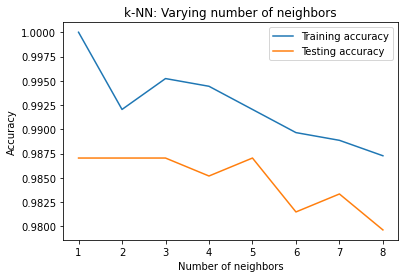

In [50]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i,k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)
    
# Generate plot
plt.title('k-NN: Varying number of neighbors')
plt.plot(neighbors,train_accuracy, label = 'Training accuracy')
plt.plot(neighbors,test_accuracy, label = 'Testing accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')